In [0]:
zfrom google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import datetime
import math
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from math import floor, ceil
from pylab import rcParams
%matplotlib inline

In [0]:
p = lambda x: f'/content/drive/My Drive/MLfinal/{x}'
iter_csv = pd.read_csv('/content/drive/My Drive/MLfinal/updated_train.csv', iterator=True, chunksize=100000)
train = pd.concat([chunk[chunk['0'] == 1] for chunk in iter_csv])
iter_csv = pd.read_csv('/content/drive/My Drive/MLfinal/updated_test.csv', iterator=True, chunksize=100000)
test = pd.concat([chunk[chunk['0'] == 1] for chunk in iter_csv])
#train = pd.read_csv(p('updated_train.csv')).loc[train['0'] == 1,]
#test = pd.read_csv(p('updated_test.csv')).loc[test['0'] == 1,]


In [0]:
train.dropna(inplace=True)
test.dropna(inplace=True)


In [0]:
train_labels = train.meter_reading
train_dataset = train.drop(columns=['meter_reading','1','2','3','0'])
test_labels = test.meter_reading
test_data = test.drop(columns = ['meter_reading','1','2','3','0'])

In [0]:
#train = train.loc[train['0'] == 1,]
#test = test.loc[test['0'] == 1,]

In [0]:
print(train_dataset.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)
print(test.shape)
print(train.shape)

(8026926, 35)
(8026926,)
(4013629, 35)
(4013629,)
(4013629, 40)
(8026926, 40)


In [0]:
train_dataset.head()

,square_feet,air_temperature,wind_speed,hour,air_temperature_3,wind_speed_3,temperature_adjusted,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage,April,August,December,February,January,July,June,March,May,November,October,September
0,7432,20.0,2.6,4.0,24.4,1.5,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,7432,19.4,0.0,5.0,22.8,0.0,1.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,7432,21.1,1.5,7.0,20.0,2.6,0.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,7432,20.6,0.0,8.0,19.4,0.0,0.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,7432,21.1,0.0,10.0,21.1,1.5,0.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
# Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(100, input_dim=35, activation= "relu"),
    #keras.layers.Dense(50, activation= "relu"),
    keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['accuracy'])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 3,701
Trainable params: 3,701
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=['mean_squared_error','accuracy'])
#mean_squared_logarithmic_error;accuracy

In [0]:
# Fit Model
import time
import os
starttime = time.time()

checkpoint_path = "/content/drive/My Drive/training_1/cp0.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_dataset, 
          train_labels,  
          epochs=8,
          callbacks=[cp_callback])  # Pass callback to training

print(time.time() - starttime)
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Train on 8026926 samples
Epoch 1/8
8026592/8026926 [============================>.] - ETA: 0s - loss: 118519.3109 - mean_squared_error: 118520.1406 - acc: 0.0018
Epoch 00001: saving model to /content/drive/My Drive/training_1/cp0.ckpt
8026926/8026926 [==============================] - 629s 78us/sample - loss: 118515.8488 - mean_squared_error: 118516.6719 - acc: 0.0018
Epoch 2/8
8026368/8026926 [============================>.] - ETA: 0s - loss: 101302.5462 - mean_squared_error: 101303.8203 - acc: 8.6191e-04
Epoch 00002: saving model to /content/drive/My Drive/training_1/cp0.ckpt
8026926/8026926 [==============================] - 632s 79us/sample - loss: 101302.3784 - mean_squared_error: 101303.6641 - acc: 8.6210e-04
Epoch 3/8
8026656/8026926 [============================>.] - ETA: 0s - loss: 99987.7799 - mean_squared_error: 99987.2891 - acc: 0.0011
Epoch 00003: saving model to /content/drive/My Drive/training_1/cp0.ckpt
8026926/8026926 [==============================] - 629s 78us/sample

In [0]:
loss, mae, mse = model.evaluate(test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

4013629/4013629 - 175s - loss: 99722.5947 - mean_squared_error: 99716.0703 - acc: 8.8199e-05
Testing set Mean Abs Error: 99716.07 MPG


In [0]:
test_predictions = model.predict(test_data).flatten()

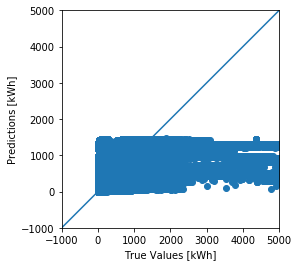

In [0]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [kWh]')
plt.ylabel('Predictions [kWh]')
lims = [-1000, 5000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Ignore Code below

In [0]:
#another way to set up data for NN. Removing ID cols, handle category columns, remove target columns. Programmed neatly
from keras.models import Sequential
from keras.layers import Dense, Activation

ID_col = ['building_id','site_id','meter']
cat_cols= ['primary_use'] # None exist
target_col = ["meter_reading"]
num_cols= list(set(list(merged_data_4.columns))-set(cat_cols)-set(ID_col)-set(target_col))

p = lambda x: f'/content/drive/My Drive/MLfinal/{x}'
merged_data_2.to_csv(p('merged_data_2_temp_root.csv'),index=False,compression='gzip')

#Creata a validation set
from sklearn.model_selection import train_test_split
#train=merged_data_4[merged_data_4['Type']==1]
#test=merged_data_4[merged_data_4['Type']==0]
features=list(set(list(merged_data_4.columns))-set(ID_col)-set(target_col))
x = merged_data_4[features].values
y = merged_data_4[target_col].values
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.30, random_state=42)

In [0]:
#Common code with LR. To prepare the data. Not run as part of this python file.
p = lambda x: f'/content/drive/My Drive/MLfinal/{x}'
train_df = pd.read_csv(p('train.csv'))
weather_df = pd.read_csv(p('updated_weather.csv'))
building_metadata_df = pd.read_csv(p('building_metadata.csv'))

def print_density(data, name="Data"):
  print(f"{name} Density:")
  for column in data.columns:
    density = str(100 * (len(data) - np.sum(data[column].isnull())) / len (data))
    print(column + ': ' + density)
  print('\n')

print_density(merged_data, "Training Data")

building_meter_data = train_df.merge(building_metadata_df, how = 'left', on='building_id')
merged_data = building_meter_data.merge(weather_df, how = 'left', on=['timestamp', 'site_id'])

merged_data = merged_data.sort_values(by=['building_id', 'meter','timestamp'])

merged_data.drop(columns=['year', 'year_built', 'floor_count','day'], inplace=True)

merged_data["timestamp"] = [datetime.datetime.strptime(time_stamp, '%Y-%m-%d %H:%M:%S') for time_stamp in merged_data["timestamp"]]

merged_data['timestamp_3'] = merged_data['timestamp'] + np.timedelta64(-3, 'h')

merged_data_2 = merged_data.merge(merged_data[['building_id','timestamp','site_id','meter','air_temperature', 'wind_speed', 'wind_direction']], how = 'left', 
                                   left_on=['building_id','timestamp_3', 'site_id','meter'], 
                                   right_on=['building_id','timestamp', 'site_id','meter'],suffixes=('','_3'))

daymap = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3 : 'Thursday',4: 'Friday',5: 'Saturday', 6: 'Sunday'}
merged_data_2["weekday"] = merged_data_2['timestamp'].map(lambda timestamp: daymap[timestamp.weekday()]) 

monthmap = {1: 'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
merged_data_2["weekday"] = merged_data_2['timestamp'].map(lambda timestamp: monthmap[timestamp.month]) 

merged_data_2['temperature_adjusted'] = merged_data_2['air_temperature'].map(lambda x: np.sqrt((x - 21)**2))

merged_data_2["meter"] = merged_data_2.meter.astype('category')

merged_data_2 = pd.get_dummies(merged_data_2, prefix='', prefix_sep='')